In [3]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
llm = HuggingFaceEndpoint(
    repo_id="google/gemma-2-2b-it",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

In [21]:
class llmState(TypedDict):
    title: str
    outline: str
    content: str
    score: str

In [22]:
def create_outline(state: llmState) -> llmState:
    prompt = f"Generate a detailed outline for a title: {state['title']}"
    outline = model.invoke(prompt)
    state['outline'] = outline
    return state

def gen_cont(state: llmState) -> llmState:
    prompt = f"Generate a blog for the title: {state['title']} with the following outline: \n{state['outline']}"
    content = model.invoke(prompt)
    state['content'] = content
    return state

def evaluate_content(state: llmState) -> llmState:
    prompt=f"Based on the title: {state['title']} and outline: {state['outline']}, evaluate the following content for relevance and coherence: {state['content']}. Generate an integer score from 1 to 10."
    score=model.invoke(prompt)
    state['score'] = score
    return state

In [23]:
graph = StateGraph(llmState)

graph.add_node("Create outline",create_outline)
graph.add_node("Genrate content",gen_cont)
graph.add_node("Evaluate content",evaluate_content)
graph.add_edge(START, "Create outline")
graph.add_edge("Create outline", "Genrate content")
graph.add_edge("Genrate content", "Evaluate content")
graph.add_edge("Evaluate content", END)
workflow = graph.compile()

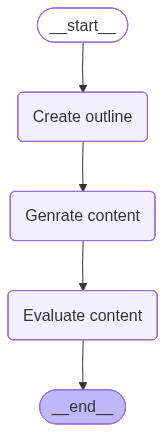

In [24]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [26]:
inital_state={"title":"The future of AI in healthcare"}
final_state=workflow.invoke(inital_state)
print(final_state)

{'title': 'The future of AI in healthcare', 'outline': AIMessage(content="##  The Future of AI in Healthcare: A Detailed Outline\n\n**I. Introduction**\n\n* **Hook:** Compelling statement highlighting the transformative impact of AI in healthcare\n* **Brief Background:**  Historical context of AI in medicine (past successes, current limitations)\n* **Thesis statement:**  AI is poised to revolutionize healthcare by enhancing diagnosis, improving treatments, personalizing care, and optimizing workflows.\n\n**II.  Current Applications of AI in Healthcare**\n\n* **A. Diagnostics:**\n    * Explain various AI-powered diagnostics tools, e.g., medical image analysis (X-rays, CT scans), pathology analysis from biopsies, disease prediction algorithms.\n    * Discuss applications for specific diseases (e.g., cancer detection, Alzheimer's disease assessment)\n* **B. Treatments & Drug Discovery:**\n    * Highlight advancements in personalized medicine using AI-driven treatment recommendations, drug

In [27]:
print(final_state['outline'].content)

##  The Future of AI in Healthcare: A Detailed Outline

**I. Introduction**

* **Hook:** Compelling statement highlighting the transformative impact of AI in healthcare
* **Brief Background:**  Historical context of AI in medicine (past successes, current limitations)
* **Thesis statement:**  AI is poised to revolutionize healthcare by enhancing diagnosis, improving treatments, personalizing care, and optimizing workflows.

**II.  Current Applications of AI in Healthcare**

* **A. Diagnostics:**
    * Explain various AI-powered diagnostics tools, e.g., medical image analysis (X-rays, CT scans), pathology analysis from biopsies, disease prediction algorithms.
    * Discuss applications for specific diseases (e.g., cancer detection, Alzheimer's disease assessment)
* **B. Treatments & Drug Discovery:**
    * Highlight advancements in personalized medicine using AI-driven treatment recommendations, drug discovery platforms, and precision dosage optimization.
*  **C. Improving Workflow Effi

In [28]:
print(final_state['content'].content)

## The Future of AI in Healthcare: A Detailed Outline

**I. Introduction**

* **Hook:**  Imagine a future where advanced AI algorithms can detect diseases with unparalleled accuracy, personalize treatments based on an individual's genetic makeup, and even manage chronic conditions through remote monitoring.
* **Brief Background:** For decades, artificial intelligence (AI) has transformed various industries, and medicine is no exception. Early AI applications involved image recognition and basic diagnoses, but recent developments have accelerated progress dramatically. 
* **Thesis statement:**  AI is poised to revolutionize healthcare by enhancing diagnosis, improving treatments, personalizing care, and infinitely optimizing workflows, promising a future of smarter and safer healthcare for all.

**II.  Current Applications of AI in Healthcare**

* **A. Diagnostics:** AI is already being implemented across various medical fields, including radiology, pathology, and ophthalmology. Advance

In [29]:
print(final_state["score"].content)

I would give the content a score of **8/10**. 

Here's why:

**Strengths:**

* **Clear and Comprehensive Outline:**  The article follows a logical structure, with well-Organized sections that clearly delineate the various aspects of AI in healthcare.
* **Balanced Perspective:**  The content presents both the exciting potential and the crucial challenges of AI in healthcare, providing a more nuanced and balanced perspective. 
* **Strong Hook:**  The opening hook about a future with AI-powered healthcare is effective in engaging the reader and effectively snags their attention. 
* **Solid Use of Examples:** The article includes a good variety of examples related to different applications of AI in healthcare, making it more grounded and relatable.
* **Flow and readability:** It's also highly readable and flows well, thanks to professional formatting and language choice.
* **Detailed Exploration of Key Areas:** The content clearly explores critical areas like diagnostics, treatment, and wo